<a href="https://colab.research.google.com/github/alvarofpinheiro/pifwia_pso/blob/main/PIFWIA_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PSO - Particle Swarm Optimization ou Otimização por Enxame de Partículas uma metaheurística proposta pelos pesquisadores Kennedy e Eberhart em 1995 para resolver problemas de otimização inspirado no comportamento das particulas, buscando melhorar a solução candidata com aplicação de uma dada medida de qualidade.

Kennedy, J.; Eberhart, R.  Particle swarm optimization. IEEE Xplore. https://doi.org/10.1109/ICNN.1995.488968, 1995.

In [ ]:
#instala biblioteca Orange Canvas
!pip install Orange3

In [ ]:
#importa bibliotecas
import Orange
import random
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
#define os hiperparâmetros
DIMENSOES = 2 #determina a quantidade de dimensões do problema
ITERACOES = 200 #quantiddade máxima de ciclos defindo quantas explorações serão feitas (episódios)
POPULACAO = 20 #tamanho da população correspondente ao número de partículas na espaço de busca
E1 = -15 #extremo esquerdo eixo x
E2 = 15 #extremo direito eixo x
E3 = -100 #extremo inferior eixo y
E4 = 100 #extremo superior eixo y
LIMITES = [E3,E4] #(bound) determina os valores mínimos e máximos do espaço de busca
FCUSTO = 'rosenbrock' #(fitness) define a aptidão da partícula na possível solução do problema
CI = 0.8 #(𝑤) coeficiente de inercia que determina o quanto a velocidade anterior influencia na velocidade atual
FI = 2.05 #(𝑐1) fator de individualidade que influencia na atração que a partícula tem em direção à melhor posição já encontrada por ela mesma (𝑃𝑏𝑒𝑠𝑡)
FS = 2.05 #(𝑐2) fator de sociabilidade que influencia na atração que a partícula tem em direção à melhor posição já encontrada por qualquer partícula vizinha a ela (𝐿𝑏𝑒𝑠𝑡)
VM = [-5,5] #velocidade máxima
PARTICULAS = [] #(swarm) array da criação das particulas

In [ ]:
#importa dados
from google.colab import files  
files.upload()

In [ ]:
#instancia objeto de dados com base no caminho gerado na importação do arquivo
dados = Orange.data.Table("/content/dados.csv")

In [ ]:
#explora os metadados e dados da arquivo importado
qtde_campos = len(dados.domain.attributes)
qtde_cont = sum(1 for a in dados.domain.attributes if a.is_continuous)
qtde_disc = sum(1 for a in dados.domain.attributes if a.is_discrete)
print("%d metadados: %d continuos, %d discretos" % (qtde_campos, qtde_cont, qtde_disc))
print("Nome dos metadados:", ", ".join(dados.domain.attributes[i].name for i in range(qtde_campos)),)
dados.domain.attributes #explora dos domínios dos atributos (campos da base de dados)
print("Qtde de Registros:", len(dados)) #explora dos dados (quantidade de registros da base de dados)
i = 0 #exibe os primeiros registros para análise dos dados importados
for d in dados[:20]:
  i += 1
  print(i, d)

7 metadados: 7 continuos, 0 discretos
Nome dos metadados: PROCESSO, ANO, COMPLEXIDADE, PAGINA, PRAZO, REVISOES, ENTREGA
Qtde de Registros: 1013
1 [2022000101, 2019, 3, 12, 10, 4, 36]
2 [2022000102, 2020, 3, 20, 10, 4, 36]
3 [2022000103, 2020, 3, 55, 15, 5, 70]
4 [2022000104, 2018, 4, 43, 10, 4, 36]
5 [2022000105, 2018, 2, 24, 10, 4, 36]
6 [2022000106, 2019, 1, 93, 15, 3, 42]
7 [2022000107, 2018, 3, 44, 10, 5, 45]
8 [2022000108, 2020, 2, 37, 10, 5, 45]
9 [2022000109, 2020, 1, 11, 10, 2, 18]
10 [2022000110, 2019, 1, 10, 5, 2, 8]
11 [2022000111, 2020, 2, 32, 10, 5, 45]
12 [2022000112, 2019, 2, 13, 10, 3, 27]
13 [2022000113, 2020, 1, 14, 10, 2, 18]
14 [2022000114, 2020, 3, 51, 15, 1, 14]
15 [2022000115, 2019, 4, 8, 5, 1, 4]
16 [2022000116, 2020, 3, 82, 15, 2, 28]
17 [2022000117, 2020, 2, 12, 10, 3, 27]
18 [2022000118, 2018, 2, 16, 10, 2, 18]
19 [2022000119, 2018, 2, 97, 15, 5, 70]
20 [2022000120, 2018, 4, 87, 15, 5, 70]


In [ ]:
#cria arrays das dimensões do problema a ser otimizado
periodo = []
complexidade = [] #1-muito baixa complexidade;2-baixa complexidade;3-média complexidade;4-alta complexidade;e,5-muito alta complexidade
pagina = []
prazo = []
revisao = []
entrega = []
i = 0
for d in dados[:POPULACAO]:
  periodo.append(d[1])
  complexidade.append(d[2])
  pagina.append(d[3])
  prazo.append(d[4])
  revisao.append(d[5])
  entrega.append(d[6])
  print("id:",i,"período:",periodo[i],"complexidade:",complexidade[i],"página:",pagina[i],"prazo:",prazo[i],"revisões:",revisao[i],"entrega:",entrega[i])
  i += 1

id: 0 período: 2019 complexidade: 3 página: 12 prazo: 10 revisões: 4 entrega: 36
id: 1 período: 2020 complexidade: 3 página: 20 prazo: 10 revisões: 4 entrega: 36
id: 2 período: 2020 complexidade: 3 página: 55 prazo: 15 revisões: 5 entrega: 70
id: 3 período: 2018 complexidade: 4 página: 43 prazo: 10 revisões: 4 entrega: 36
id: 4 período: 2018 complexidade: 2 página: 24 prazo: 10 revisões: 4 entrega: 36
id: 5 período: 2019 complexidade: 1 página: 93 prazo: 15 revisões: 3 entrega: 42
id: 6 período: 2018 complexidade: 3 página: 44 prazo: 10 revisões: 5 entrega: 45
id: 7 período: 2020 complexidade: 2 página: 37 prazo: 10 revisões: 5 entrega: 45
id: 8 período: 2020 complexidade: 1 página: 11 prazo: 10 revisões: 2 entrega: 18
id: 9 período: 2019 complexidade: 1 página: 10 prazo: 5 revisões: 2 entrega: 8
id: 10 período: 2020 complexidade: 2 página: 32 prazo: 10 revisões: 5 entrega: 45
id: 11 período: 2019 complexidade: 2 página: 13 prazo: 10 revisões: 3 entrega: 27
id: 12 período: 2020 complex

In [ ]:
#função custo ou objetivo ou aptidão ou otimização ou fitness - usada para buscar o melhor ponto dentro de um espaço de buscao (melhor global) sem ficar preso em um melhor local
def fcusto(problema, possivel_solucao, alfa=0, beta=0, gama=0, delta=0, epsilon=0, zeta=0):
  total = 0.0
  if problema == 'rosenbrock':
    for i in range(DIMENSOES-1):
      total += 100*(possivel_solucao[i+1] - possivel_solucao[i]**2)**2 + (1-possivel_solucao[i])**2
  elif problema == 'esfera':
    for i in range(DIMENSOES):
      total += possivel_solucao[i]**2
  elif problema == 'custo':
    for i in range(DIMENSOES-1):
      total += 1 / abs(sum([coord ** 2 for coord in possivel_solucao]))
  elif problema == 'caminho':
    denominador = sum([(caminho.feromonio)**alfa * (1 / caminho.comprimento)**beta for caminho in possivel_solucao])
    distribuicao_probabilidades = None
    if denominador == 0:
      distribuicao_probabilidades = [1 / len(possivel_solucao)  for _ in possivel_solucao]
    else:
      distribuicao_probabilidades = [((caminho.feromonio)**alfa * (1 / caminho.comprimento)**beta) / denominador for caminho in possivel_solucao]
    total = choice(possivel_solucao, 1, p=distribuicao_probabilidades)[0]
  elif problema == "distância":
    total = 0
    pontos = []
    for i in range(POPULACAO): 
      if i < POPULACAO - 1:
        total += pontos[possivel_solucao[i]].distancia(pontos[possivel_solucao[i+1]])
      else:
        total += pontos[possivel_solucao[i]].distancia(pontos[possivel_solucao[0]])
    total = 1/total
  else:
    print('Problema não encontrado!')
  return total

In [ ]:
#particula - unidade base da otimização, posicionada numa determinada posição no espaço de busca do problema, representando uma solução em potencial para o problema
class Particula:
  def __init__(self):
    self.lista_posicao = []
    self.lista_velocidade = []
    self.fitness = np.inf
    self.fitness_pbest = np.inf
    self.lista_posicao_pbest = []

In [ ]:
#calcula fitness
def calculo_fitness(particula):
  particula.fitness = fcusto(FCUSTO, particula.lista_posicao)
  if (particula.fitness < particula.fitness_pbest):
    particula.fitness_pbest = particula.fitness
    particula.lista_posicao_pbest = list(particula.lista_posicao)

In [ ]:
#calcula velocidade
def atualizacao_velocidade_global(particula, lista_gbest):
  for i in range(DIMENSOES):
    ele1 = random.random()
    ele2 = random.random()
    velocidade_cognitiva = FI*ele1* (particula.lista_posicao_pbest[i] - particula.lista_posicao[i])
    velocidade_social = FS*ele2* (lista_gbest[i] - particula.lista_posicao[i])
    v = CI * particula.lista_velocidade[i] + velocidade_cognitiva + velocidade_social
    if v > LIMITES[1]:
      v = LIMITES[1]
    elif v < LIMITES[0]:
      v = LIMITES[0]
    particula.lista_velocidade[i] = v

In [ ]:
#calcula atualização da posição da partícula
def atualiza_posicao(particula, bound):
  for i in range(DIMENSOES):
    novo_valor = particula.lista_posicao[i] + particula.lista_velocidade[i]
    if novo_valor > bound[1]:
      novo_valor =  bound[1]
    if novo_valor < bound[0]:
      novo_valor = bound[0]
    particula.lista_posicao[i] = novo_valor

In [ ]:
#plota posições no gráfico
def exibe_grafico(titulo,x,y):
  plt.axis([E1,E2,E3,E4])
  plt.plot(0,0, marker='*', markersize=10, color='b')
  plt.title(titulo)
  for i in range(POPULACAO):
    plt.plot(x[i],y[i],marker='o')
  plt.show()

In [ ]:
#inicializa população (particulas)
for i in range(POPULACAO):
  cpx = complexidade[i]
  pag = pagina[i]
  p = Particula()
  for j in range(DIMENSOES):
    if (j == 0):
      posicao = cpx
    elif (j == 1):
      posicao = pag
    else:
      print('Dimensão não encontrado!')
    p.lista_posicao.append(posicao)
    p.lista_velocidade.append(random.uniform(VM[0], VM[1]))
  PARTICULAS.append(p)

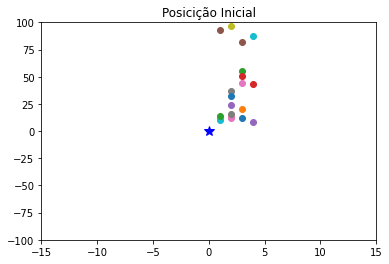

In [ ]:
#posiciona as partículas no espaço de busca
x = []
y = []
for i in range(POPULACAO):
  particula = PARTICULAS[i]
  d1,d2 = zip(particula.lista_posicao)
  x.append(d1)
  y.append(d2)
exibe_grafico('Posicição Inicial',x,y)

Iteração: 1


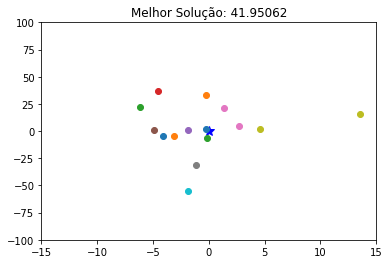

Iteração: 2


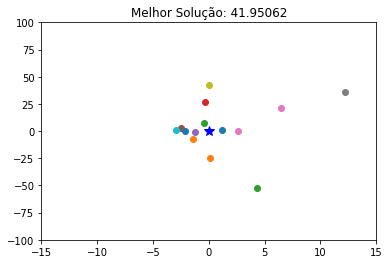

Iteração: 3


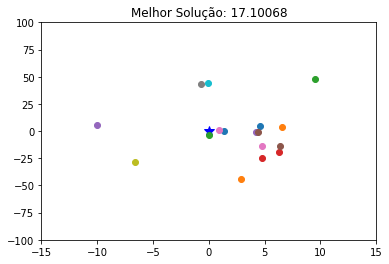

Iteração: 4


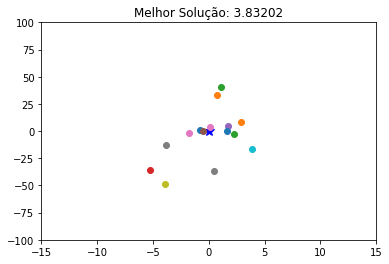

Iteração: 5


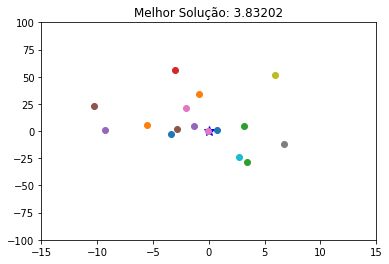

Iteração: 6


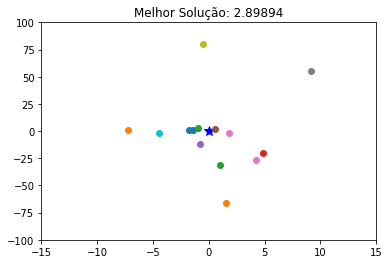

Iteração: 7


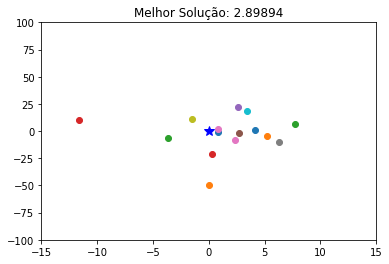

Iteração: 8


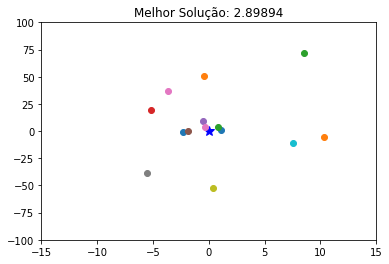

Iteração: 9


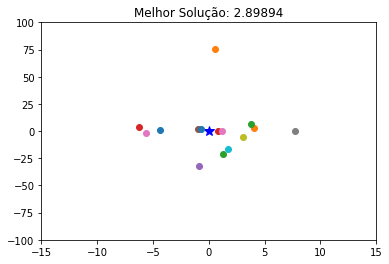

Iteração: 10


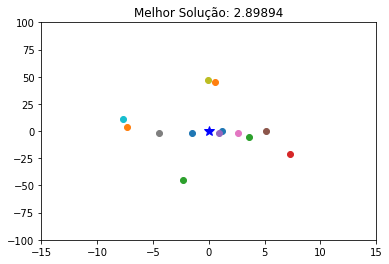

Iteração: 11


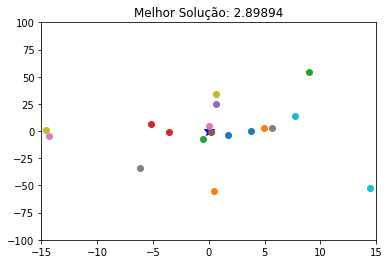

Iteração: 12


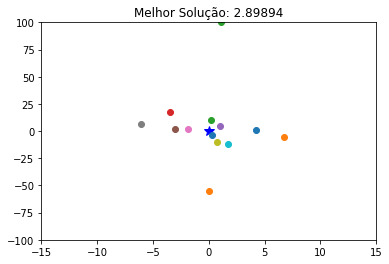

Iteração: 13


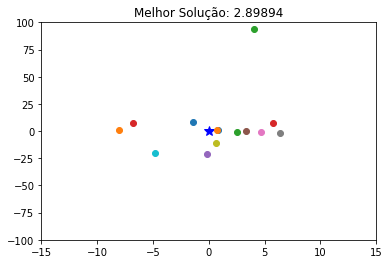

Iteração: 14


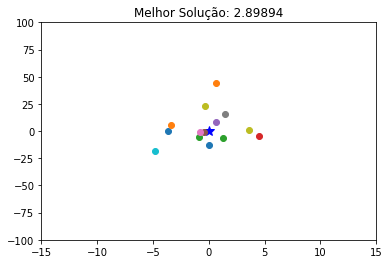

Iteração: 15


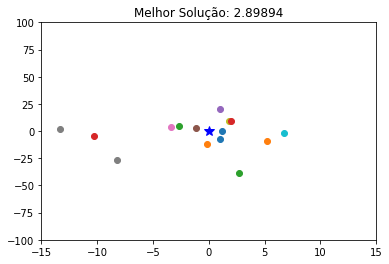

Iteração: 16


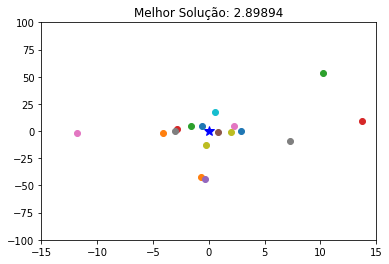

Iteração: 17


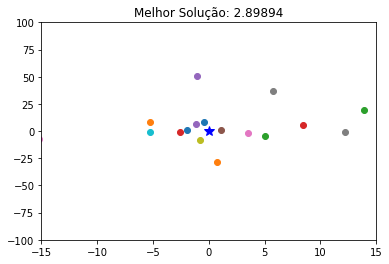

Iteração: 18


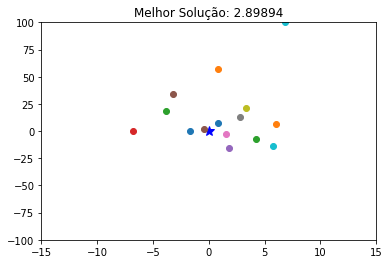

Iteração: 19


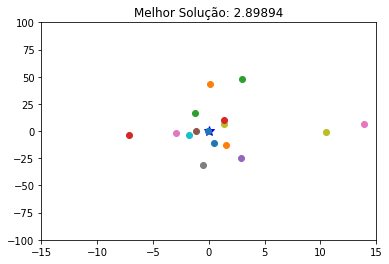

Iteração: 20


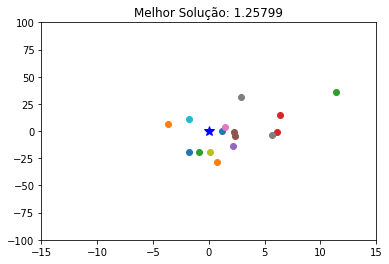

Iteração: 21


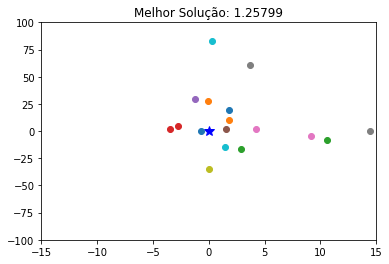

Iteração: 22


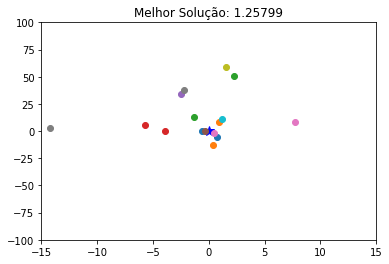

Iteração: 23


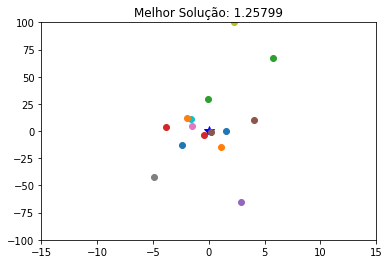

Iteração: 24


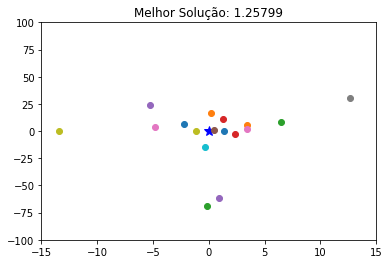

Iteração: 25


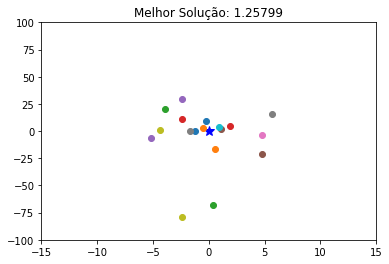

Iteração: 26


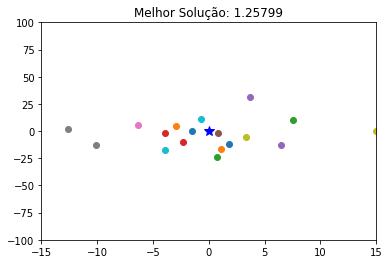

Iteração: 27


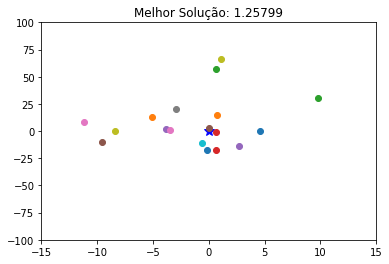

Iteração: 28


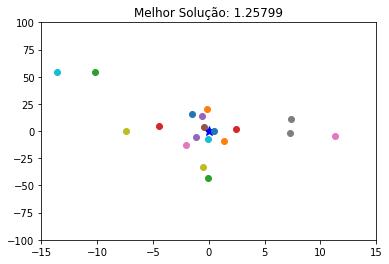

Iteração: 29


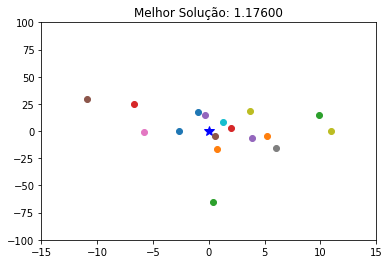

Iteração: 30


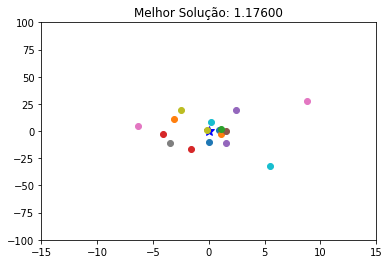

Iteração: 31


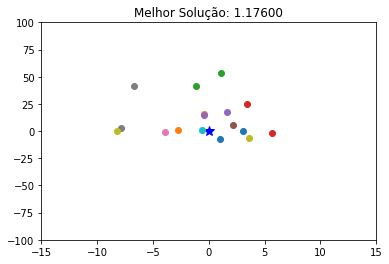

Iteração: 32


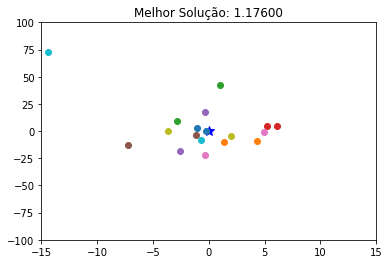

Iteração: 33


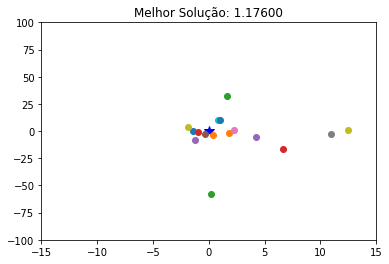

Iteração: 34


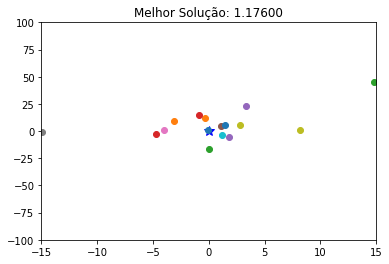

Iteração: 35


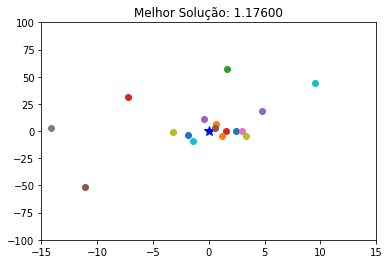

Iteração: 36


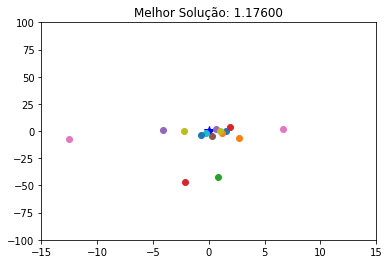

Iteração: 37


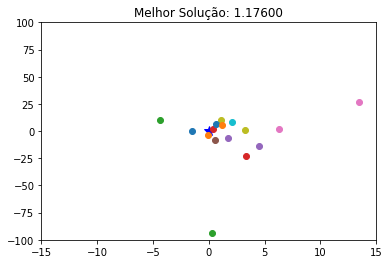

Iteração: 38


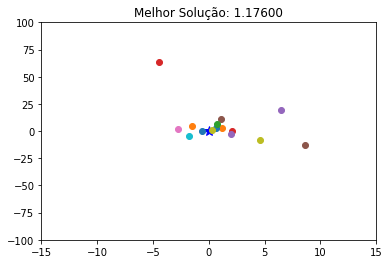

Iteração: 39


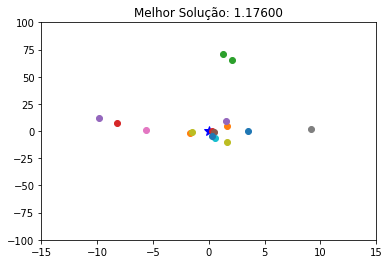

Iteração: 40


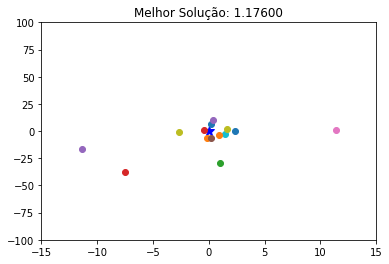

Iteração: 41


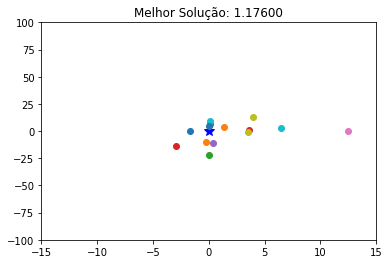

Iteração: 42


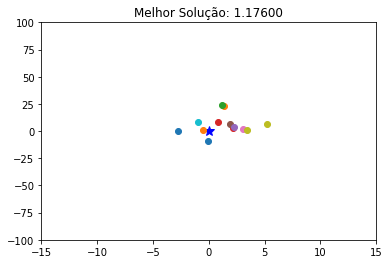

Iteração: 43


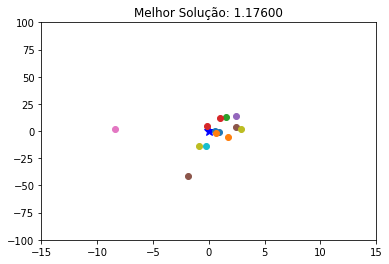

Iteração: 44


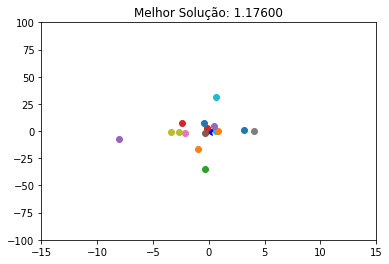

Iteração: 45


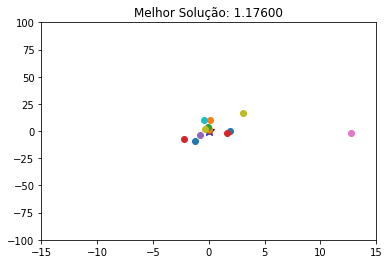

Iteração: 46


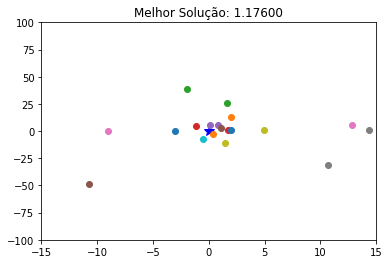

Iteração: 47


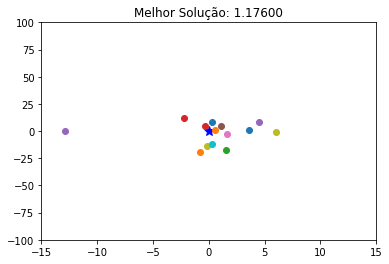

Iteração: 48


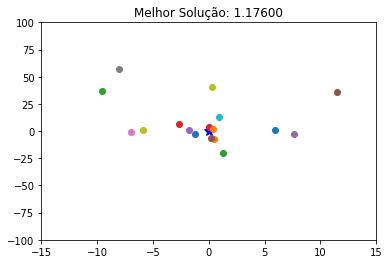

Iteração: 49


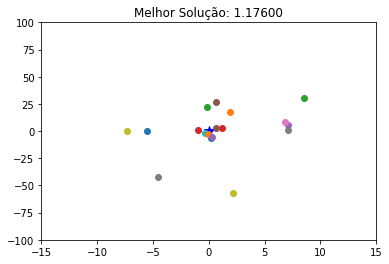

Iteração: 50


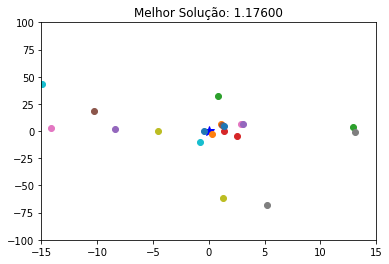

Iteração: 51


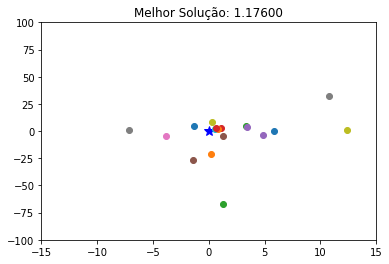

Iteração: 52


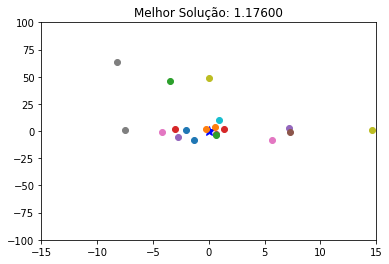

Iteração: 53


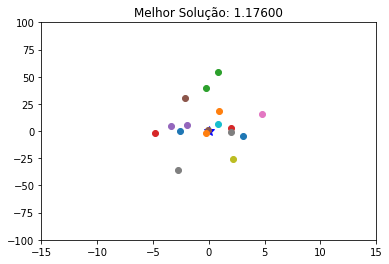

Iteração: 54


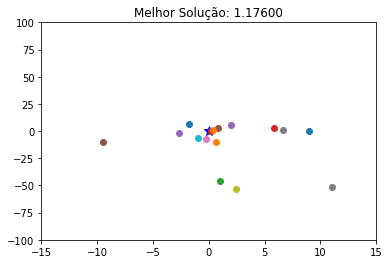

Iteração: 55


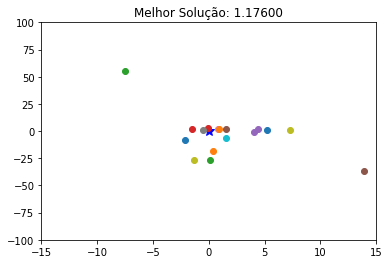

Iteração: 56


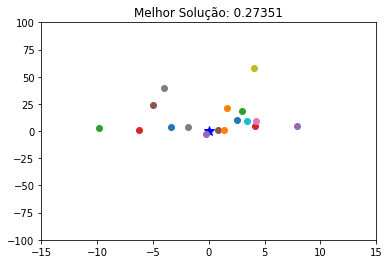

Iteração: 57


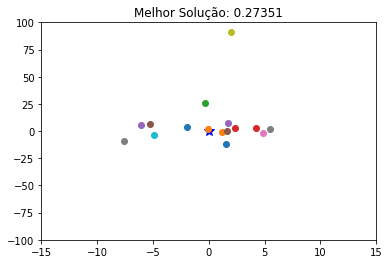

Iteração: 58


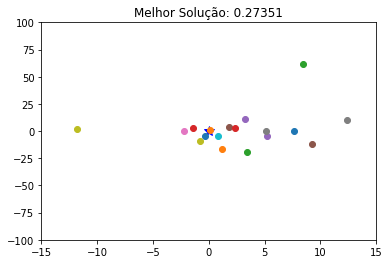

Iteração: 59


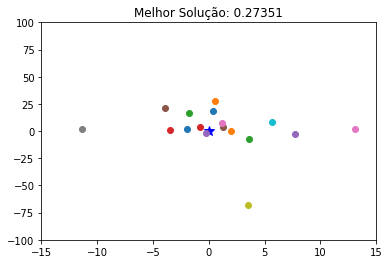

Iteração: 60


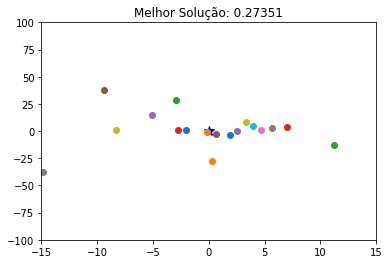

Iteração: 61


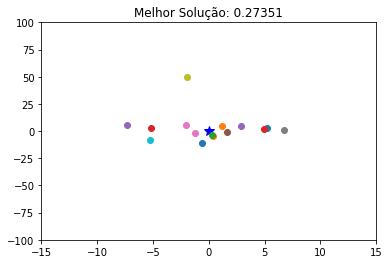

Iteração: 62


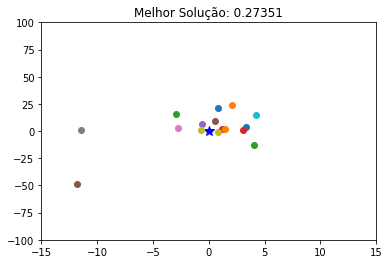

Iteração: 63


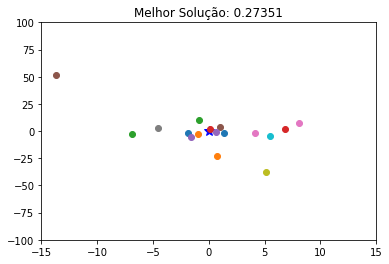

Iteração: 64


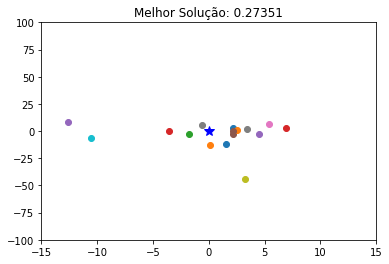

Iteração: 65


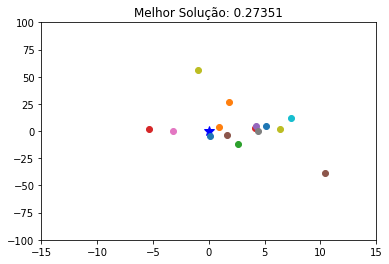

Iteração: 66


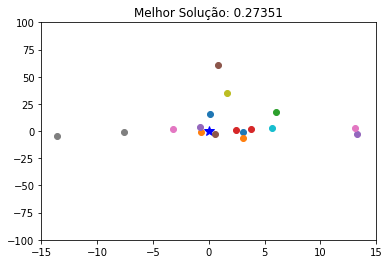

Iteração: 67


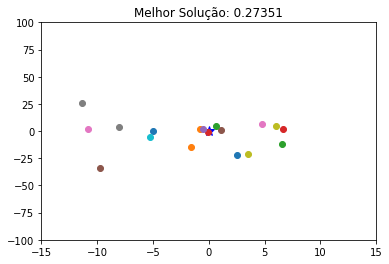

Iteração: 68


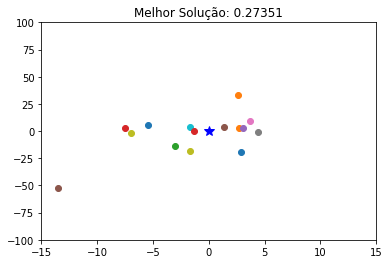

Iteração: 69


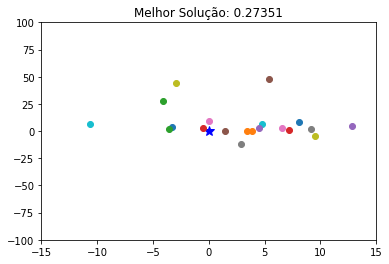

Iteração: 70


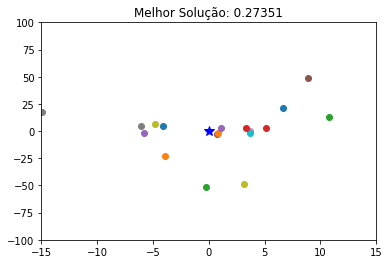

Iteração: 71


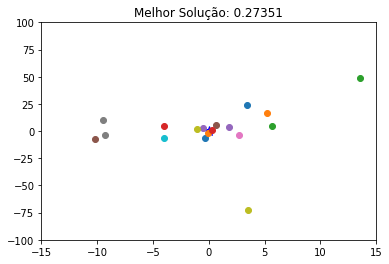

Iteração: 72


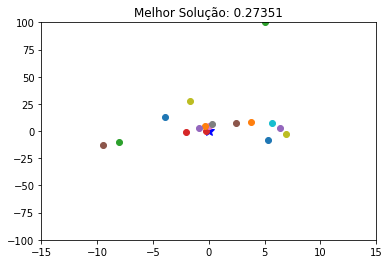

Iteração: 73


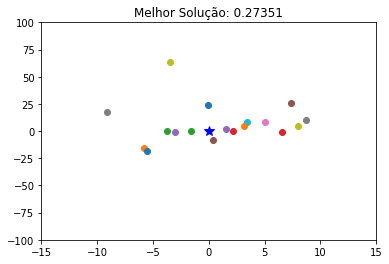

Iteração: 74


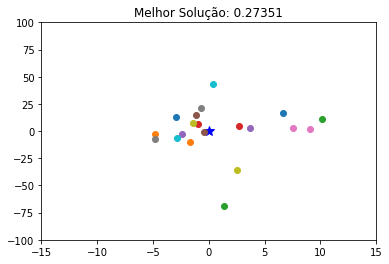

Iteração: 75


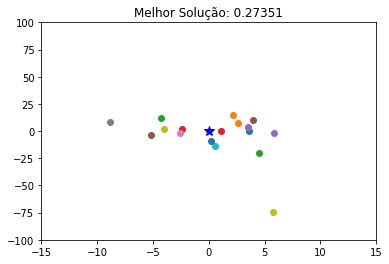

Iteração: 76


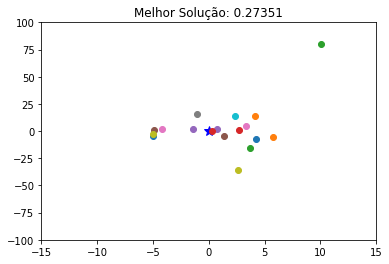

Iteração: 77


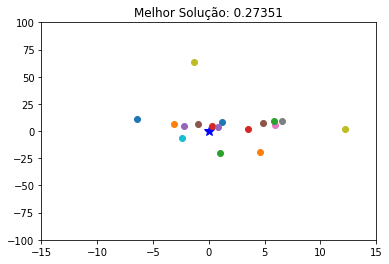

Iteração: 78


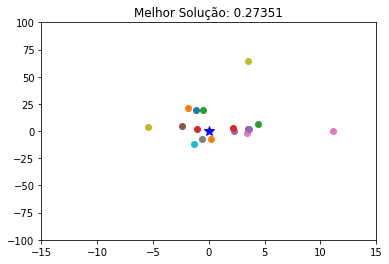

Iteração: 79


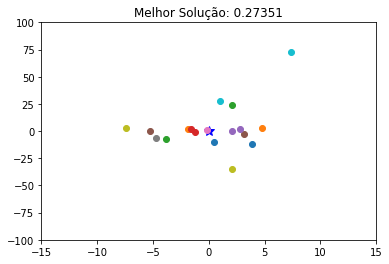

Iteração: 80


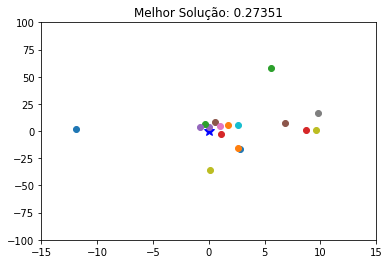

Iteração: 81


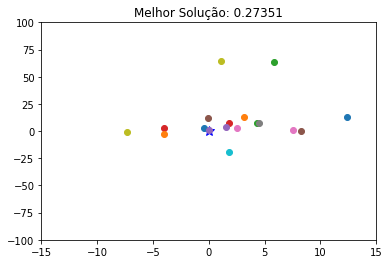

Iteração: 82


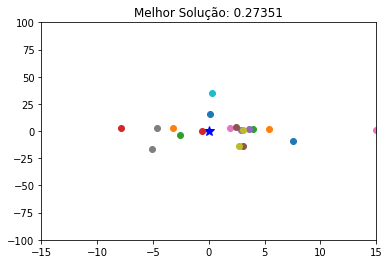

Iteração: 83


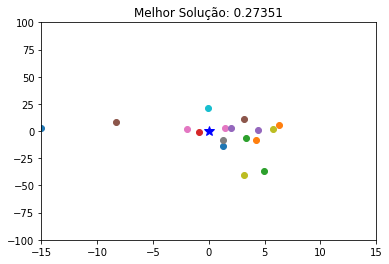

Iteração: 84


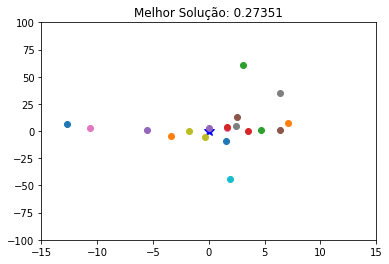

Iteração: 85


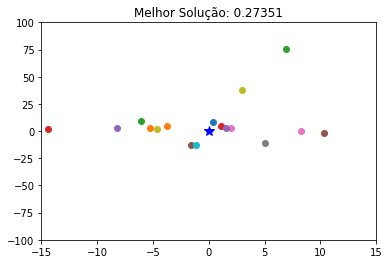

Iteração: 86


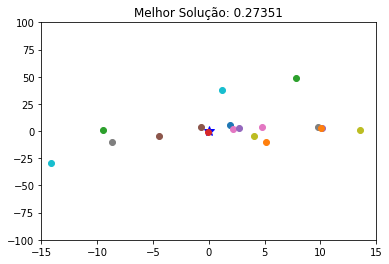

Iteração: 87


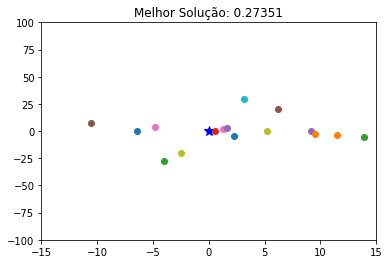

Iteração: 88


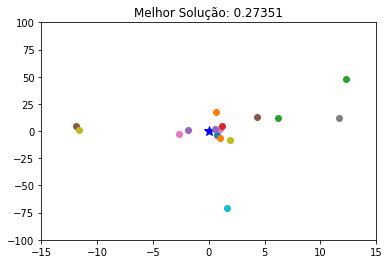

Iteração: 89


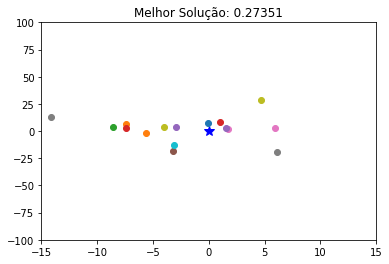

Iteração: 90


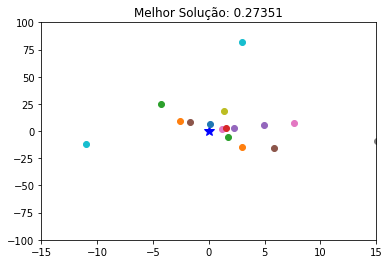

Iteração: 91


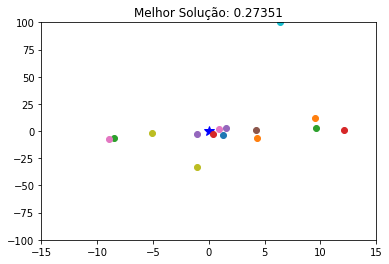

Iteração: 92


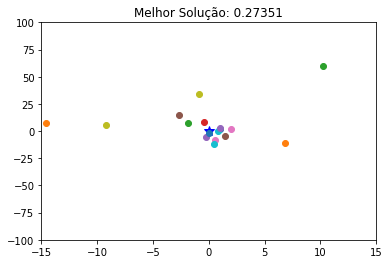

Iteração: 93


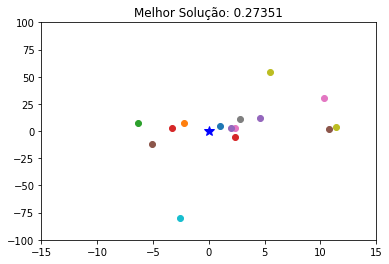

Iteração: 94


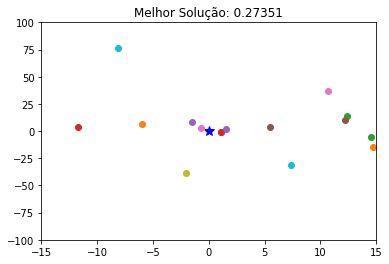

Iteração: 95


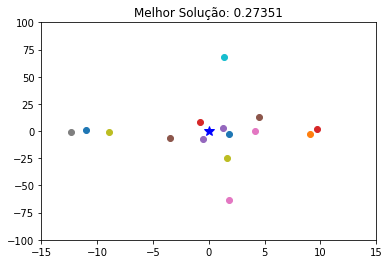

Iteração: 96


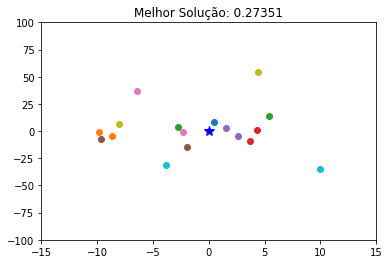

Iteração: 97


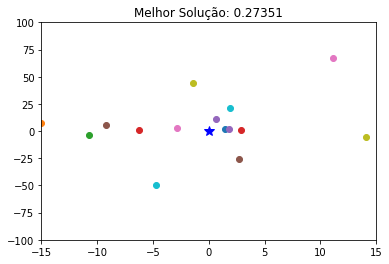

Iteração: 98


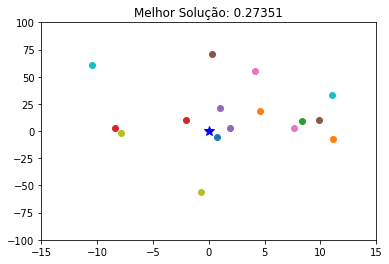

Iteração: 99


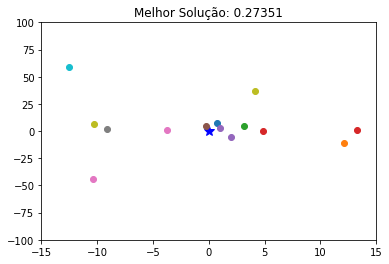

Iteração: 100


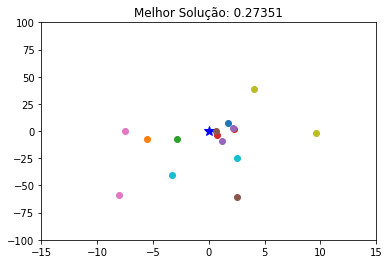

Iteração: 101


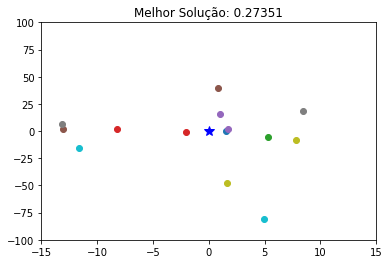

Iteração: 102


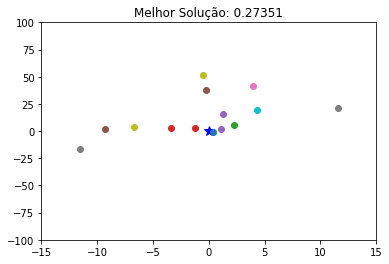

Iteração: 103


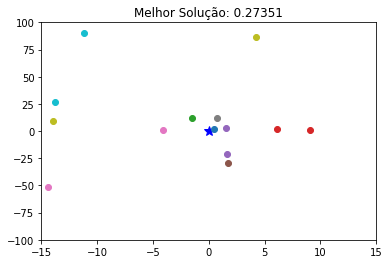

Iteração: 104


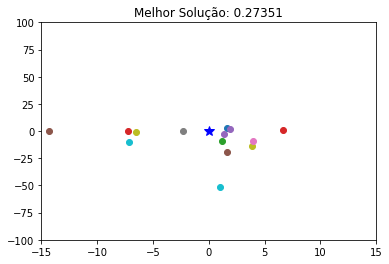

Iteração: 105


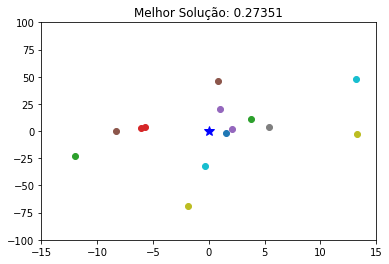

Iteração: 106


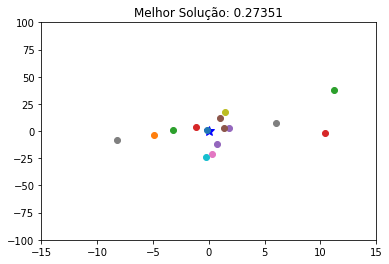

Iteração: 107


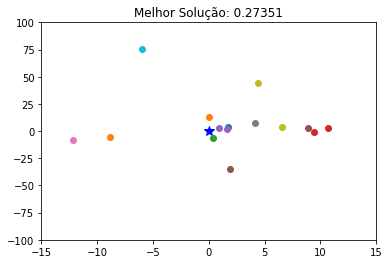

Iteração: 108


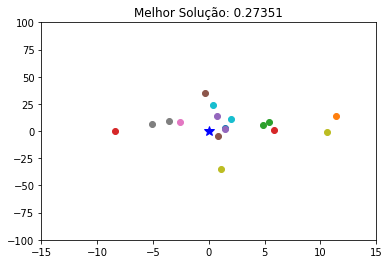

Iteração: 109


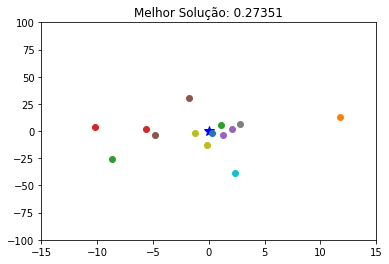

Iteração: 110


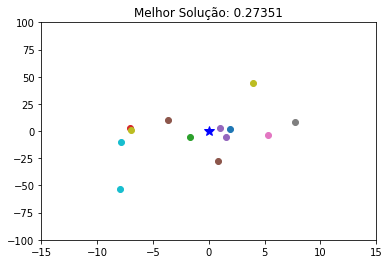

Iteração: 111


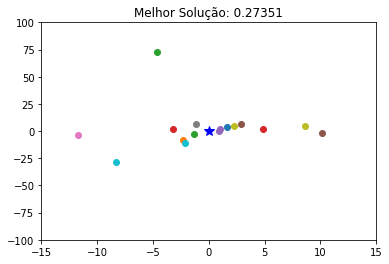

Iteração: 112


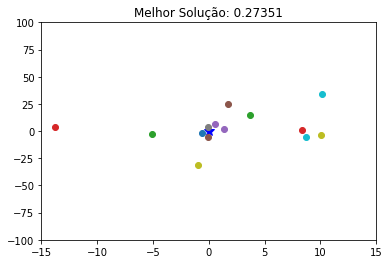

Iteração: 113


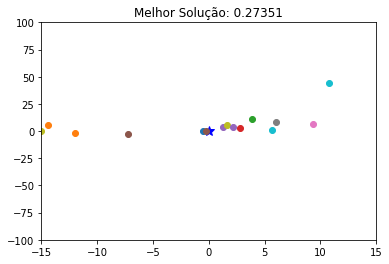

Iteração: 114


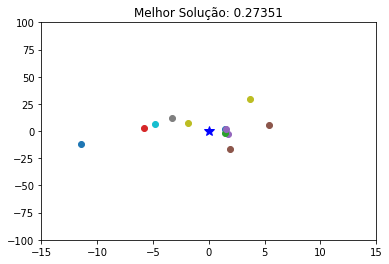

Iteração: 115


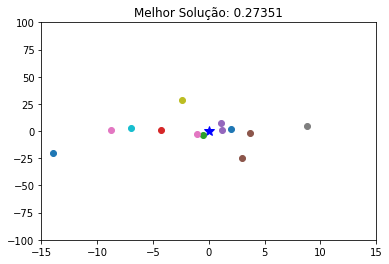

Iteração: 116


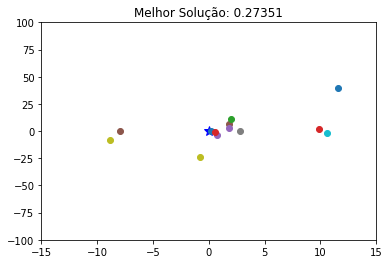

Iteração: 117


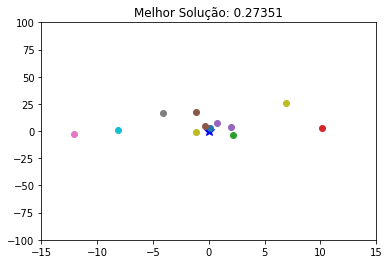

Iteração: 118


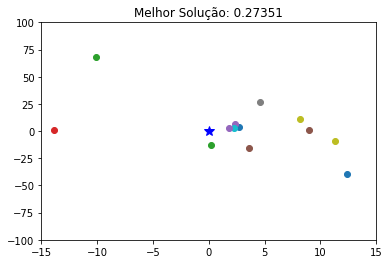

Iteração: 119


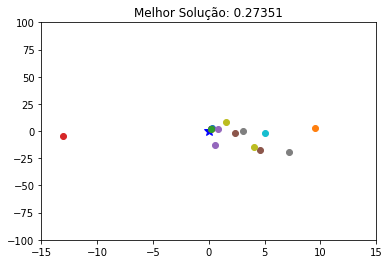

Iteração: 120


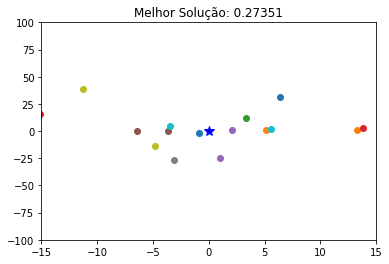

Iteração: 121


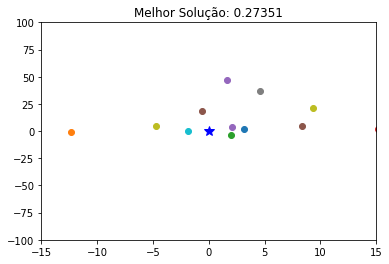

Iteração: 122


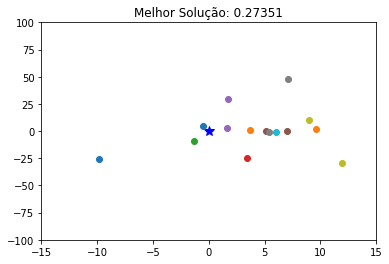

Iteração: 123


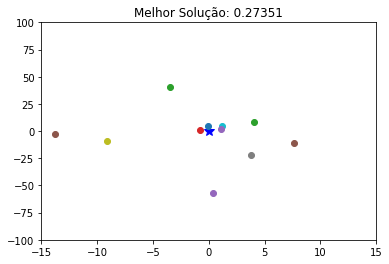

Iteração: 124


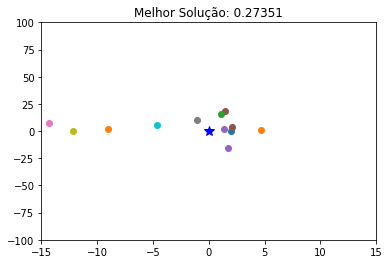

Iteração: 125


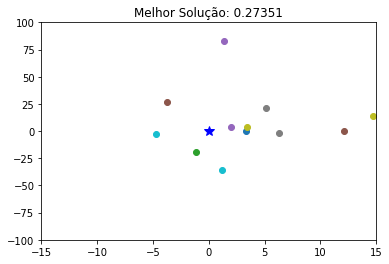

Iteração: 126


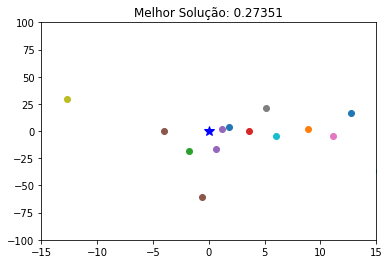

Iteração: 127


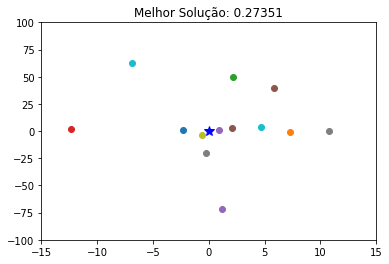

Iteração: 128


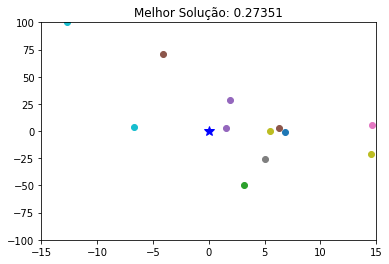

Iteração: 129


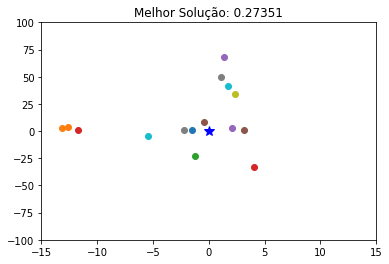

Iteração: 130


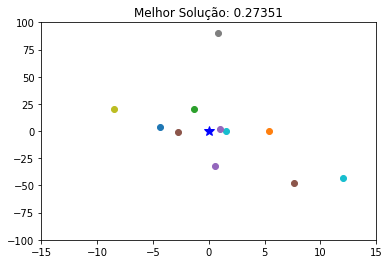

Iteração: 131


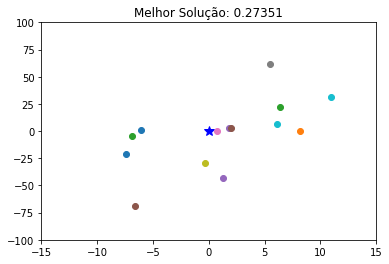

Iteração: 132


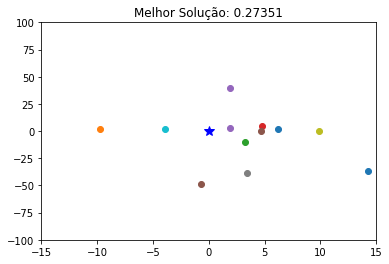

Iteração: 133


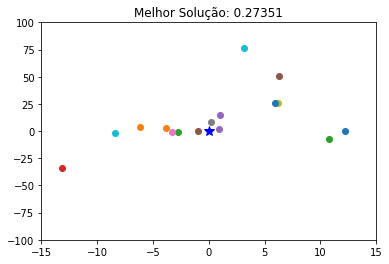

Iteração: 134


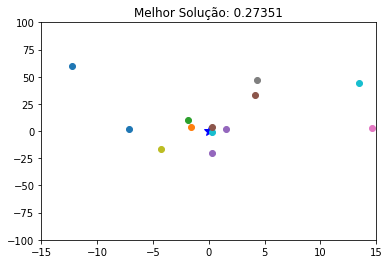

Iteração: 135


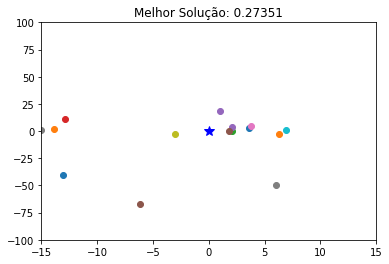

Iteração: 136


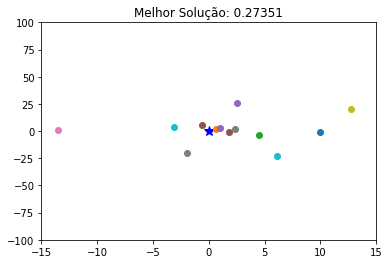

Iteração: 137


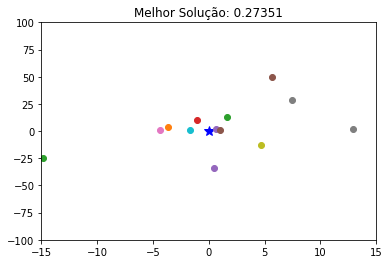

Iteração: 138


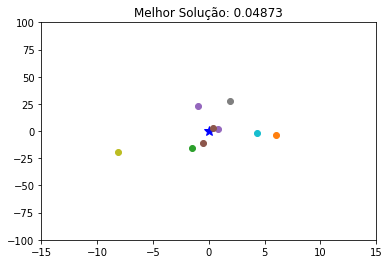

Iteração: 139


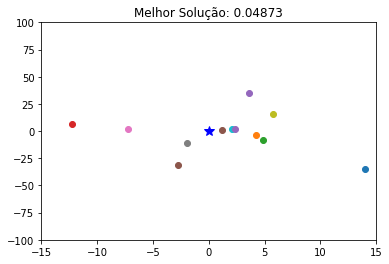

Iteração: 140


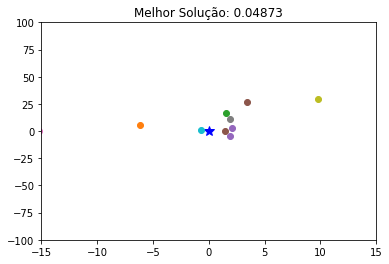

Iteração: 141


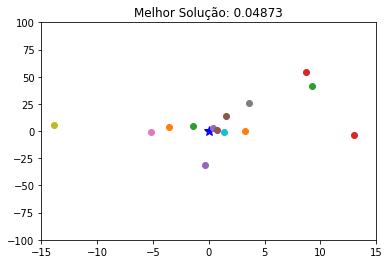

Iteração: 142


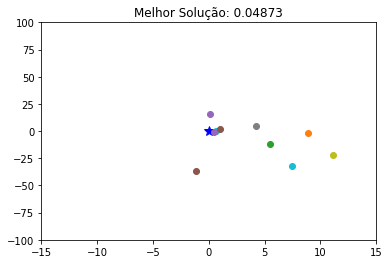

Iteração: 143


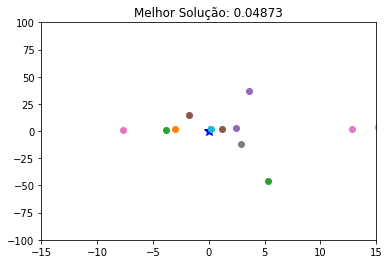

Iteração: 144


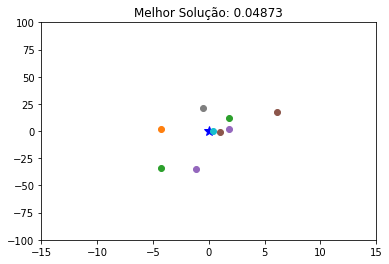

Iteração: 145


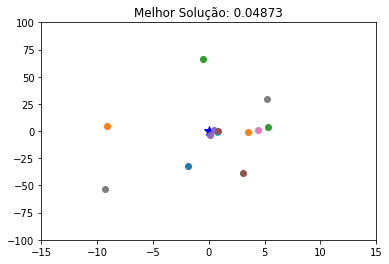

Iteração: 146


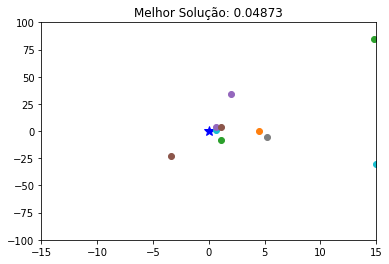

Iteração: 147


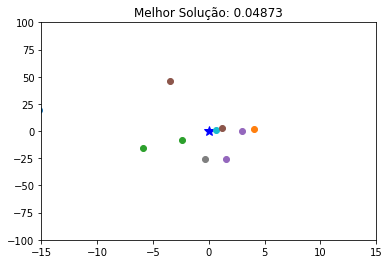

Iteração: 148


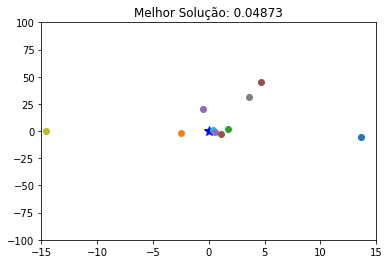

Iteração: 149


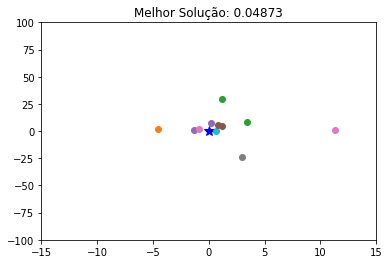

Iteração: 150


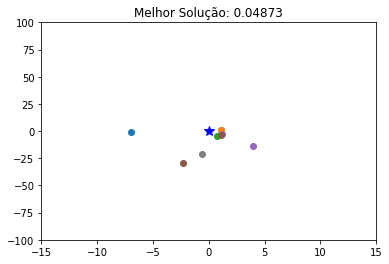

Iteração: 151


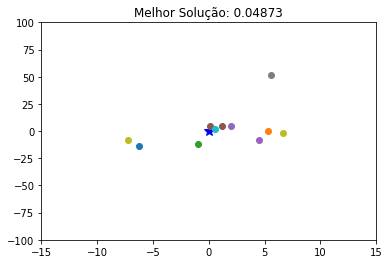

Iteração: 152


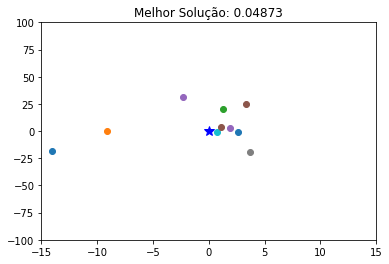

Iteração: 153


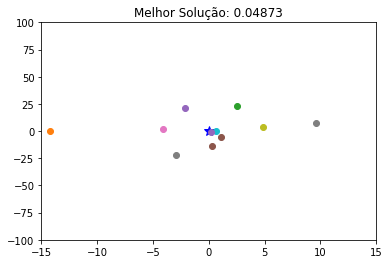

Iteração: 154


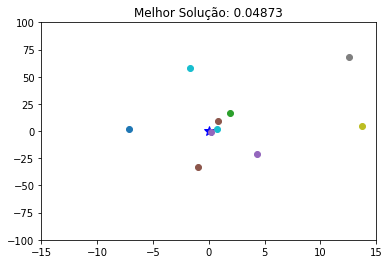

Iteração: 155


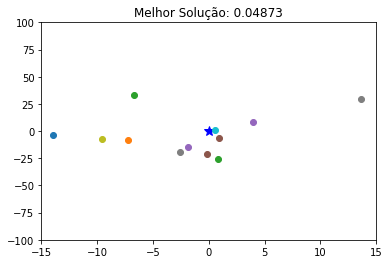

Iteração: 156


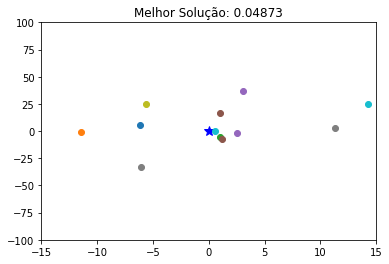

Iteração: 157


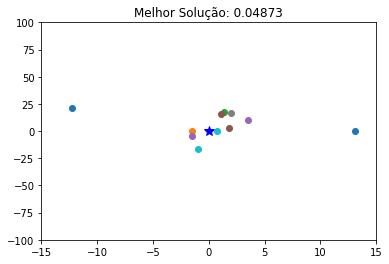

Iteração: 158


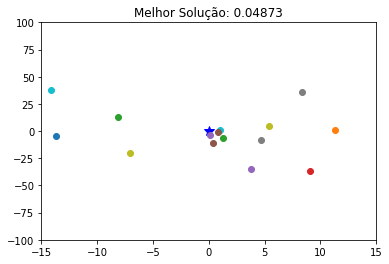

Iteração: 159


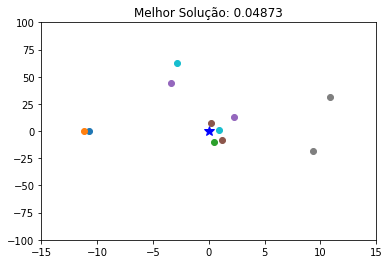

Iteração: 160


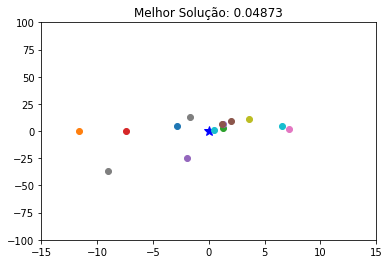

Iteração: 161


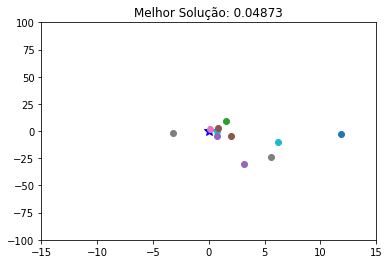

Iteração: 162


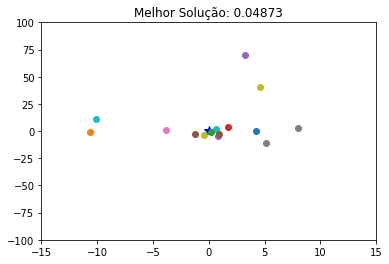

Iteração: 163


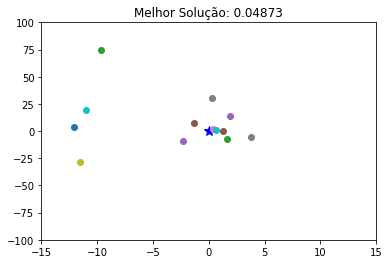

Iteração: 164


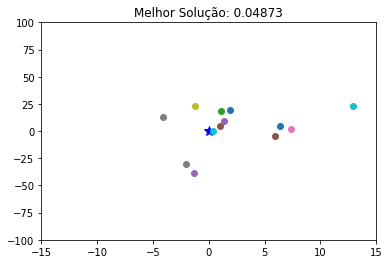

Iteração: 165


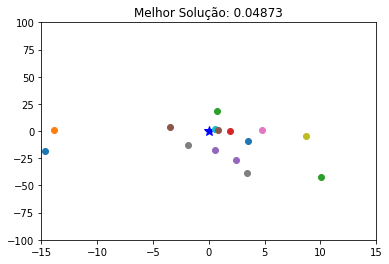

Iteração: 166


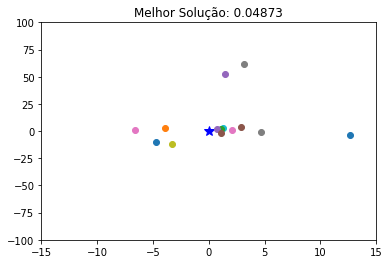

Iteração: 167


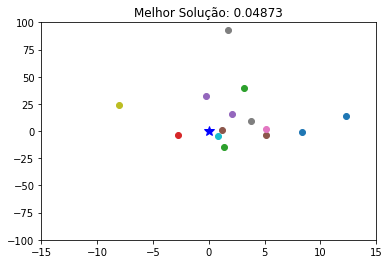

Iteração: 168


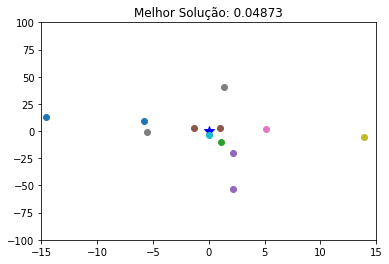

Iteração: 169


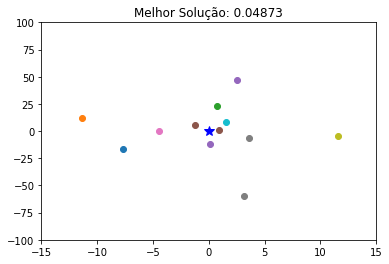

Iteração: 170


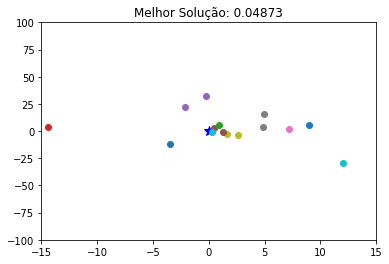

Iteração: 171


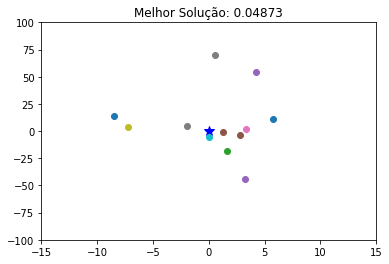

Iteração: 172


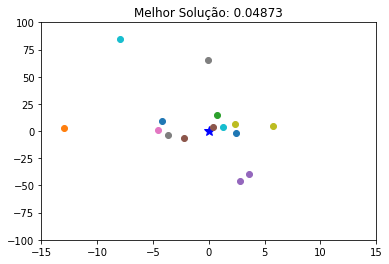

Iteração: 173


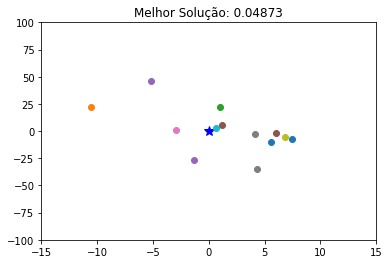

Iteração: 174


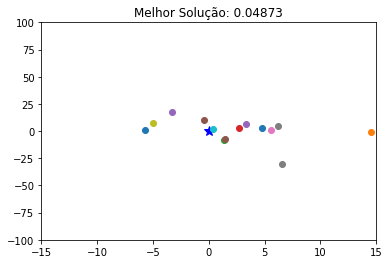

Iteração: 175


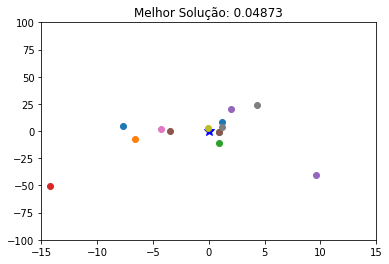

Iteração: 176


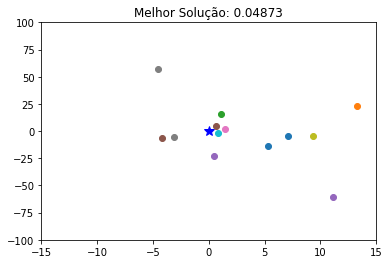

Iteração: 177


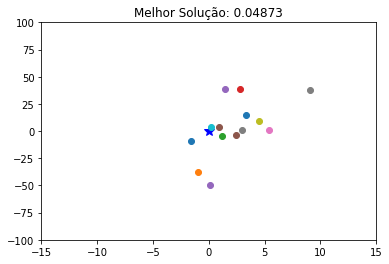

Iteração: 178


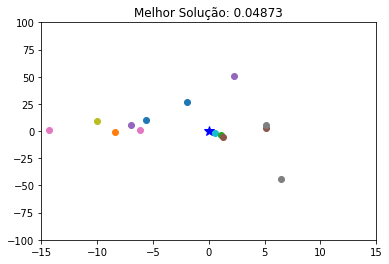

Iteração: 179


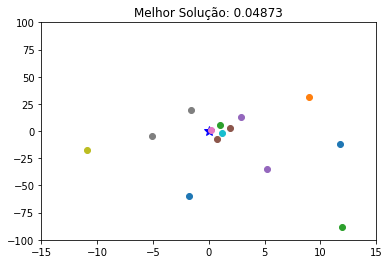

Iteração: 180


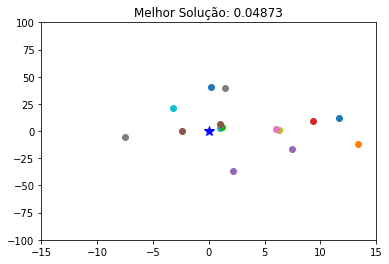

Iteração: 181


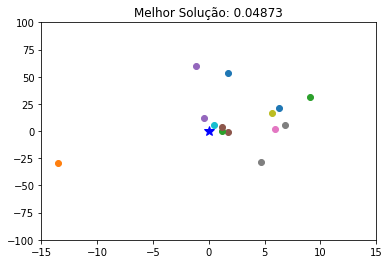

Iteração: 182


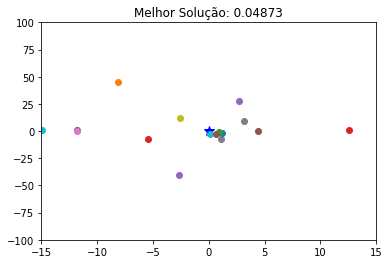

Iteração: 183


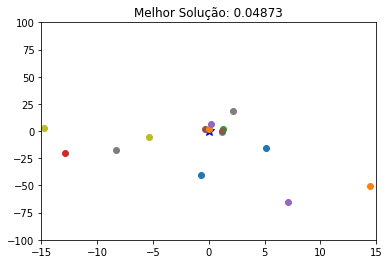

Iteração: 184


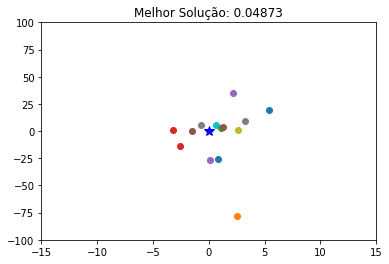

Iteração: 185


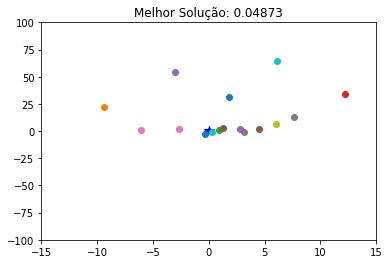

Iteração: 186


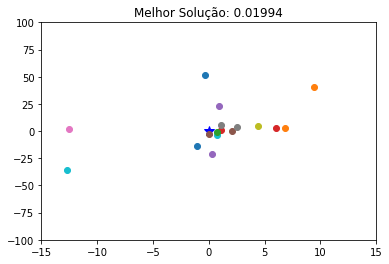

Iteração: 187


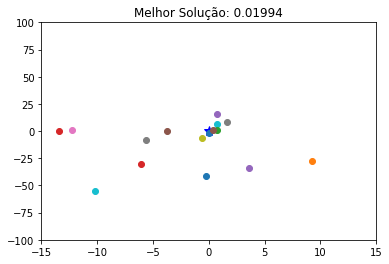

Iteração: 188


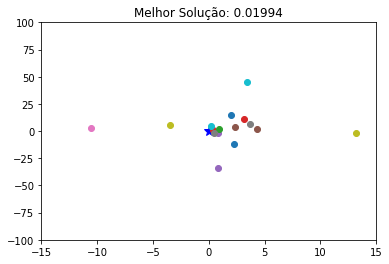

Iteração: 189


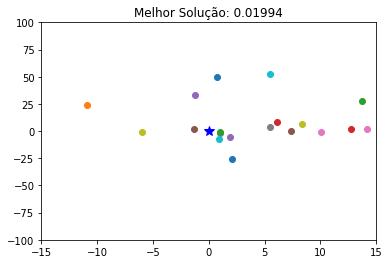

Iteração: 190


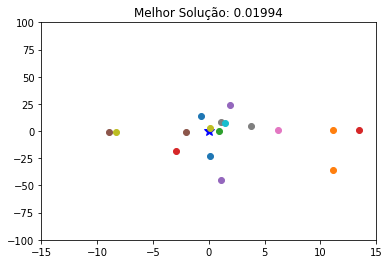

Iteração: 191


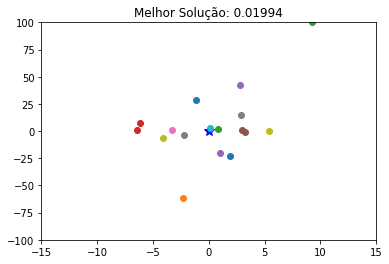

Iteração: 192


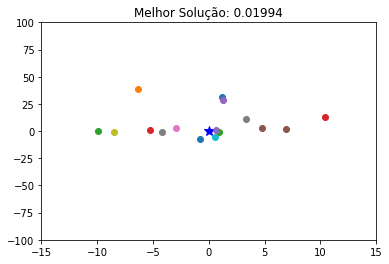

Iteração: 193


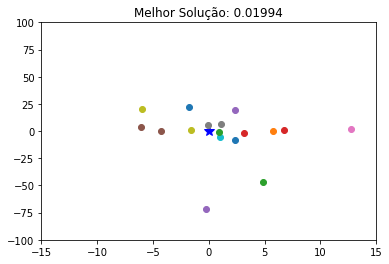

Iteração: 194


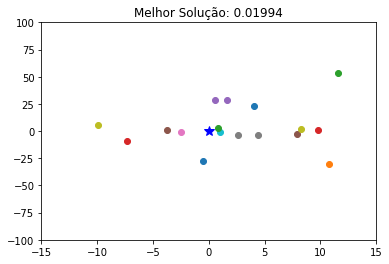

Iteração: 195


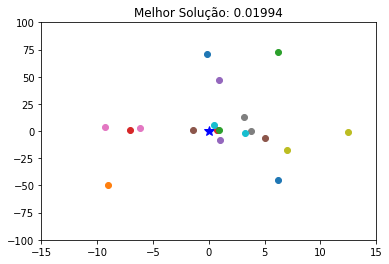

Iteração: 196


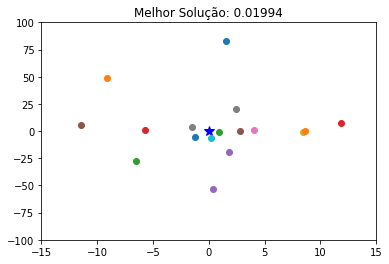

Iteração: 197


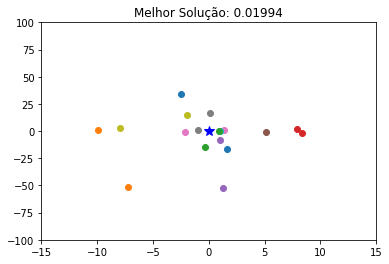

Iteração: 198


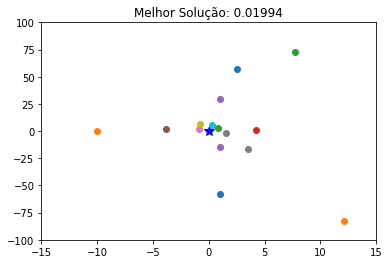

Iteração: 199


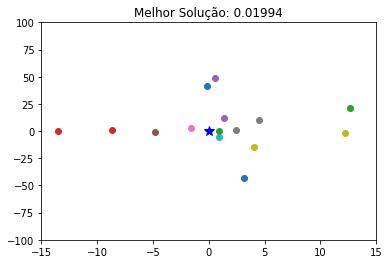

Iteração: 200


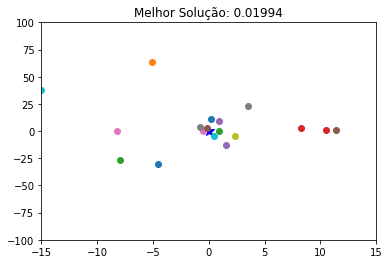

In [ ]:
#otimização PSO
fitness_gbest = float('inf')
lista_posicao_gbest = []
lista_melhores_valores = []
convergencia = []
for i in range(ITERACOES):
  print("Iteração: {:.0f}".format(i+1))
  for j in range(POPULACAO):
    calculo_fitness(PARTICULAS[j])
    if  PARTICULAS[j].fitness < fitness_gbest:
     fitness_gbest = PARTICULAS[j].fitness
     lista_posicao_gbest = list(PARTICULAS[j].lista_posicao)
  for j in range(POPULACAO):
    atualizacao_velocidade_global(PARTICULAS[j],lista_posicao_gbest)
    atualiza_posicao(PARTICULAS[j],LIMITES)
  lista_melhores_valores.append(fitness_gbest)
  x = []
  y = []
  for i in range(POPULACAO):
    particula = PARTICULAS[i]
    d1,d2 = zip(particula.lista_posicao)
    x.append(d1)
    y.append(d2)
  exibe_grafico('Melhor Solução: {:.5f}'.format(fitness_gbest),x,y) #plt.plot(fitness_gbest, marker='x', markersize=15, color='r') #ponto gbest
  convergencia.append(fitness_gbest)

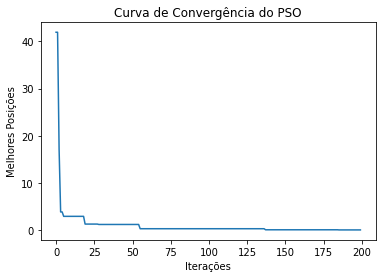

In [ ]:
#exibe curva de convergência das partículas
x = []
y = []
for i in range(ITERACOES):
  x.append(i)
  y.append(convergencia[i])
plt.title("Curva de Convergência do PSO")
plt.xlabel("Iterações")
plt.ylabel("Melhores Posições")
plt.plot(x,y)
plt.show()
#for i in range(ITERACOES): print("iteração:",i,"posição:",convergencia[i])